# Similarity based recommendation system:

### Item based filtering


In [131]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler , MultiLabelBinarizer
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity

In [132]:
rests = pd.read_csv('./data/restaurant.csv')
rests.columns = rests.columns.str.lower()
for col in rests.columns:
    rests[col] = rests[col].str.lower()
rests.head()

,restaurant,city,cuisine
0,kochi kitchen,kerala,"north indian, mughlai, chinese"
1,hotel chandra,hyderabad,"cafe, mexican, italian"
2,cafe coffee day surat,surat,"north indian, rajasthani"
3,hotel krc palace,tezpur,north indian
4,galaxy surat,surat,"north indian, south indian, andhra, chinese"


In [133]:
# covert cuisines to one hot encoding format:
rests['cuisine_list'] = rests['cuisine'].apply(lambda x : [cuisine.strip() for cuisine in x.split(',')])

mlb = MultiLabelBinarizer()
cuisines = pd.DataFrame(mlb.fit_transform(rests['cuisine_list']) , columns = mlb.classes_ , index = rests.index)
df = pd.concat([rests.drop(columns = ['cuisine_list']) , cuisines] , axis = 1)
df.head()

,restaurant,city,cuisine,almond soup,american,andhra,arabian,asian,au gratin,baby corn masala,...,tex-mex,thai,thali,tiramisu,vada,vanilla ice cream,veg supreme pizza,vegetarian,vietnamese,waffles
0,kochi kitchen,kerala,"north indian, mughlai, chinese",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,hotel chandra,hyderabad,"cafe, mexican, italian",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,cafe coffee day surat,surat,"north indian, rajasthani",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,hotel krc palace,tezpur,north indian,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,galaxy surat,surat,"north indian, south indian, andhra, chinese",0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
latlong = pd.read_csv('./data/india_cities_latLong.csv')

for col in  latlong.columns:
    # print(f'{latlong[col].str.lower()}')
    # print(f"{type(latlong[col][0])}")
    if( type(latlong[col].iloc[0]) == str):
        latlong[col] = latlong[col].str.lower()

latlong = latlong[['city' , 'lat' , 'lng']]

# remove encoding:

import unicodedata
#normalzing kagaznāgār - to. - kagaznagar
def norm(word):
  return unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8')

latlong['city'] = latlong['city'].apply(norm)

latlong.head()

,city,lat,lng
0,delhi,28.6600,77.2300
1,mumbai,18.9667,72.8333
2,kolkata,22.5411,88.3378
3,bangalore,12.9699,77.5980
4,chennai,13.0825,80.2750


In [135]:
df.head()

,restaurant,city,cuisine,almond soup,american,andhra,arabian,asian,au gratin,baby corn masala,...,tex-mex,thai,thali,tiramisu,vada,vanilla ice cream,veg supreme pizza,vegetarian,vietnamese,waffles
0,kochi kitchen,kerala,"north indian, mughlai, chinese",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,hotel chandra,hyderabad,"cafe, mexican, italian",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,cafe coffee day surat,surat,"north indian, rajasthani",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,hotel krc palace,tezpur,north indian,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,galaxy surat,surat,"north indian, south indian, andhra, chinese",0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
dff = pd.merge( df , latlong , on = 'city')
dff.dropna(inplace  = True)
dff.drop(['cuisine' , 'city'] , axis = 1 , inplace = True)
dff.set_index("restaurant" , inplace=True)
dff.head()

,almond soup,american,andhra,arabian,asian,au gratin,baby corn masala,babycorn manchurian,bakery,barbeque chicken,...,thali,tiramisu,vada,vanilla ice cream,veg supreme pizza,vegetarian,vietnamese,waffles,lat,lng
restaurant,,,,,,,,,,,,,,,,,,,,,
hotel chandra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,17.3667,78.4667
cafe coffee day surat,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,21.1700,72.8300
galaxy surat,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,21.1700,72.8300
the coral tree,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,27.1800,78.0200
radisson blu hotel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,22.7206,75.8472


In [137]:
ncols = [*dff.columns[-2:] , *dff.columns[:-2]]
dff = dff[ncols]
dff.head()

,lat,lng,almond soup,american,andhra,arabian,asian,au gratin,baby corn masala,babycorn manchurian,...,tex-mex,thai,thali,tiramisu,vada,vanilla ice cream,veg supreme pizza,vegetarian,vietnamese,waffles
restaurant,,,,,,,,,,,,,,,,,,,,,
hotel chandra,17.3667,78.4667,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cafe coffee day surat,21.1700,72.8300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
galaxy surat,21.1700,72.8300,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
the coral tree,27.1800,78.0200,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
radisson blu hotel,22.7206,75.8472,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
#normalize dataset:
sclaer = MinMaxScaler()
dfscaled = sclaer.fit_transform(dff)
df = pd.DataFrame(dfscaled , columns = dff.columns , index = dff.index)
df.head()

,lat,lng,almond soup,american,andhra,arabian,asian,au gratin,baby corn masala,babycorn manchurian,...,tex-mex,thai,thali,tiramisu,vada,vanilla ice cream,veg supreme pizza,vegetarian,vietnamese,waffles
restaurant,,,,,,,,,,,,,,,,,,,,,
hotel chandra,0.261968,0.457844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cafe coffee day surat,0.458947,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
galaxy surat,0.458947,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
the coral tree,0.770216,0.421561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
radisson blu hotel,0.539256,0.245074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#get top five restaurants according to similarity measure:
def recommend(restaurant , similarityMatrix , asc = False):
    rests = similarityMatrix[restaurant].sort_values(ascending = asc)
    # print(rests)
    return rests.iloc[1:5]

In [179]:
cmat = cosine_similarity(df)
cmat = pd.DataFrame(cosine_similarity(df) , index = df.index , columns = df.index)
cmat.head()

restaurant,hotel chandra,cafe coffee day surat,galaxy surat,the coral tree,radisson blu hotel,domino's surat,hotel sheela,hotel sita niwas,hotel celebration,chandan tea,...,paasha,ukiyo,dakshin,karavalli,lotus pavilion,haldirams,ashoka restaurant,mkt,thyme,food exchange
restaurant,,,,,,,,,,,,,,,,,,,,,
hotel chandra,1.000000,0.044661,0.032361,0.681114,0.679913,0.044661,0.780490,0.643232,0.688857,0.688857,...,0.064153,0.064153,0.095895,0.070150,0.070150,0.123950,0.104563,0.671595,0.125999,0.156437
cafe coffee day surat,0.044661,1.000000,0.396808,0.122431,0.090933,0.547641,0.098968,0.153822,0.100528,0.100528,...,0.094229,0.094229,0.009854,0.007208,0.007208,0.090016,0.075936,0.133610,0.155314,0.192834
galaxy surat,0.032361,0.396808,1.000000,0.088711,0.065888,0.724577,0.071710,0.111456,0.072840,0.303223,...,0.068276,0.068276,0.007140,0.005223,0.005223,0.065223,0.055022,0.096810,0.112537,0.139723
the coral tree,0.681114,0.122431,0.088711,1.000000,0.708542,0.122431,0.593990,0.985258,0.962129,0.718686,...,0.138235,0.138235,0.091021,0.066585,0.066585,0.185853,0.156783,0.473530,0.245240,0.304484
radisson blu hotel,0.679913,0.090933,0.065888,0.708542,1.000000,0.090933,0.572753,0.702207,0.675737,0.675737,...,0.100509,0.100509,0.057730,0.042231,0.042231,0.129194,0.108986,0.430275,0.176391,0.219003


In [180]:
recommend('galaxy surat' , cmat)

restaurant
galaxy surat              1.000000
hotel amar vilas          0.992365
novotel                   0.970766
ashok hotel               0.894843
shangri la delhi          0.842194
                            ...   
corner house ice cream    0.005223
karavalli                 0.005223
lotus pavilion            0.005223
onesta                    0.004315
park hyatt                0.003303
Name: galaxy surat, Length: 200, dtype: float64


restaurant
hotel amar vilas    0.992365
novotel             0.970766
ashok hotel         0.894843
shangri la delhi    0.842194
Name: galaxy surat, dtype: float64

In [142]:
emat = pd.DataFrame(pairwise_distances(df , metric = 'euclidean') , index = df.index , columns = df.index)
emat.head()

restaurant,hotel chandra,cafe coffee day surat,galaxy surat,the coral tree,radisson blu hotel,domino's surat,hotel sheela,hotel sita niwas,hotel celebration,chandan tea,...,paasha,ukiyo,dakshin,karavalli,lotus pavilion,haldirams,ashoka restaurant,mkt,thyme,food exchange
restaurant,,,,,,,,,,,,,,,,,,,,,
hotel chandra,0.000000,2.290943,2.692289,1.503207,1.456763,2.290943,1.503207,1.622033,1.573597,1.573597,...,2.035648,2.035648,2.014158,2.248741,2.248741,2.245213,2.457840,1.534640,2.314114,2.086893
cafe coffee day surat,2.290943,0.000000,2.000000,2.296650,2.250891,1.414214,2.697147,2.306439,2.460260,2.460260,...,1.739476,1.739476,1.824926,2.080951,2.080951,2.063486,2.293027,2.297409,2.068354,1.810549
galaxy surat,2.692289,2.000000,0.000000,2.697147,2.658291,1.414214,3.045423,2.705487,2.837760,2.460260,...,2.241825,2.241825,2.308756,2.516020,2.516020,2.501594,2.694063,2.697793,2.505611,2.297409
the coral tree,1.503207,2.296650,2.697147,0.000000,1.443776,2.296650,2.000000,0.345108,0.584127,1.530099,...,2.077407,2.077407,2.131389,2.354320,2.354320,2.259395,2.470802,2.002657,2.238444,2.002657
radisson blu hotel,1.456763,2.250891,2.658291,1.443776,0.000000,2.250891,2.021012,1.489579,1.610065,1.610065,...,2.018296,2.018296,2.067669,2.296792,2.296792,2.252924,2.464887,2.026815,2.260084,2.026815


In [143]:
recommend('galaxy surat' , emat , True)

restaurant
hotel amar vilas    0.257896
novotel             0.498420
ashok hotel         1.032720
shangri la delhi    1.130580
Name: galaxy surat, dtype: float64

In [144]:
manmat = pd.DataFrame(pairwise_distances(df , metric = 'manhattan') , index = df.index , columns = df.index)
manmat.head()

restaurant,hotel chandra,cafe coffee day surat,galaxy surat,the coral tree,radisson blu hotel,domino's surat,hotel sheela,hotel sita niwas,hotel celebration,chandan tea,...,paasha,ukiyo,dakshin,karavalli,lotus pavilion,haldirams,ashoka restaurant,mkt,thyme,food exchange
restaurant,,,,,,,,,,,,,,,,,,,,,
hotel chandra,0.000000,5.654823,7.654823,2.544531,2.490058,5.654823,2.544531,3.031801,2.969091,2.969091,...,4.434274,4.434274,4.298279,5.298279,5.298279,5.246213,6.246213,2.689860,5.689860,4.689860
cafe coffee day surat,5.654823,0.000000,4.000000,5.732829,5.325382,2.000000,7.732829,5.705128,6.229955,6.229955,...,3.220549,3.220549,3.811981,4.811981,4.811981,4.508745,5.508745,5.744947,4.744947,3.744947
galaxy surat,7.654823,4.000000,0.000000,7.732829,7.325382,2.000000,9.732829,7.705128,8.229955,6.229955,...,5.220549,5.220549,5.811981,6.811981,6.811981,6.508745,7.508745,7.744947,6.744947,5.744947
the coral tree,2.544531,5.732829,7.732829,0.000000,2.407447,5.732829,4.000000,0.487269,0.659753,2.659753,...,4.786817,4.786817,4.770243,5.770243,5.770243,5.398453,6.398453,4.145328,5.145328,4.145328
radisson blu hotel,2.490058,5.325382,7.325382,2.407447,0.000000,5.325382,4.407447,2.541743,2.904573,2.904573,...,4.379370,4.379370,4.647215,5.647215,5.647215,5.343980,6.343980,4.419565,5.419565,4.419565


In [145]:
recommend('galaxy surat' , manmat , True)

restaurant
hotel amar vilas    0.325382
novotel             0.654823
ashok hotel         1.325382
shangri la delhi    1.745312
Name: galaxy surat, dtype: float64

In [146]:
recommend('radisson blu hotel' , cmat)

restaurant
rajmandir                       0.989307
the table                       0.985528
radisson blu hotel new delhi    0.879641
sadda pind                      0.872146
Name: radisson blu hotel, dtype: float64

## Similarity on images:


In [147]:
# 1. Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from keras.datasets import fashion_mnist
plt.style.use('dark_background')


In [148]:
(xtrain , ytrain) , (xtest , ytest) = fashion_mnist.load_data()
print(f"Training data shape: {xtrain.shape}")
print(f"Testing data shape: {xtest.shape}")

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


In [149]:
class_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

In [150]:
# get unique categories
uniqueClasses = [class_labels[cat] for cat in np.unique(ytrain)]
uniqueClasses

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

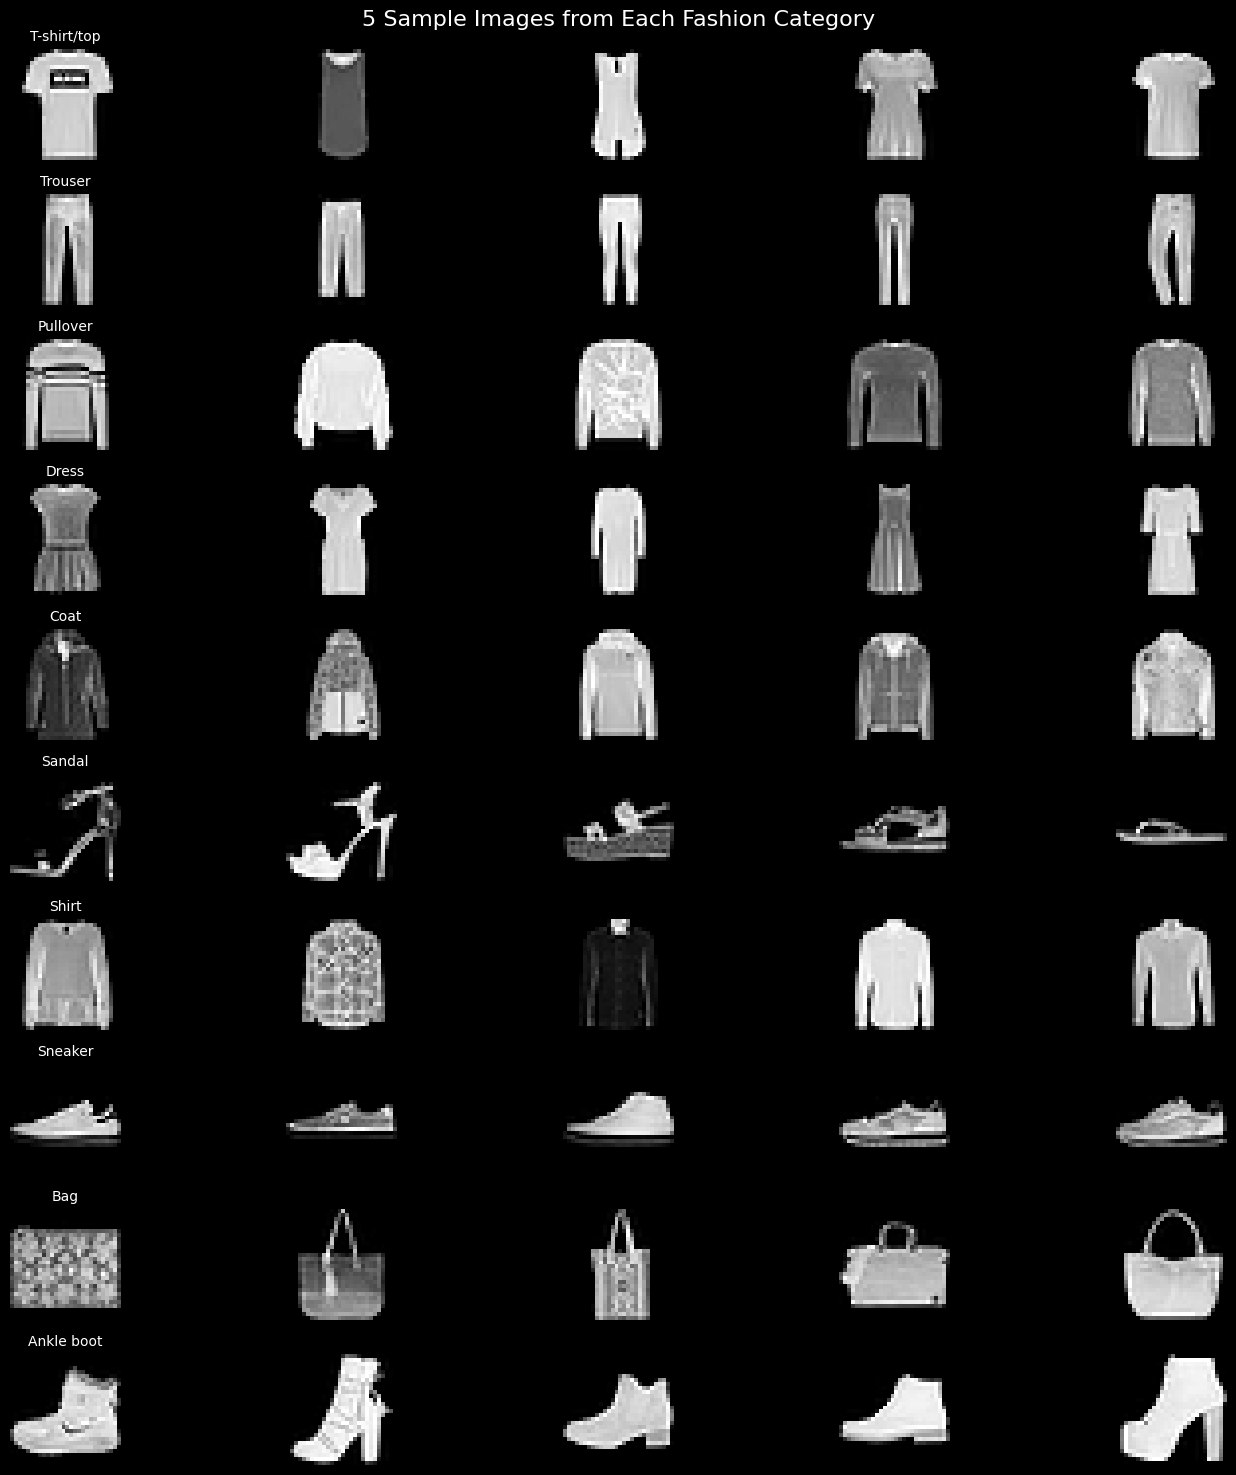

In [151]:
# plot five images per category
plt.figure(figsize = (15,15))
ss = 5
for label in np.unique(ytrain):
    #get 5 ids for this label:
    ids = np.where(ytrain == label)[0][:ss]

    for i , id in enumerate(ids):
        plti = label * ss + i + 1
        plt.subplot(10 , ss , plti)
        plt.imshow(xtrain[id] , cmap = 'gray')
        plt.axis('off')

        if i == 0:
            plt.title(class_labels[label] , fontsize = 10)

plt.suptitle("5 Sample Images from Each Fashion Category", fontsize=16)
plt.tight_layout()
plt.show()

In [157]:
#flatten each image:
xtflat = np.ravel(xtest).reshape(-1 , 784)
print(f'{xtflat.shape}')

(10000, 784)


In [158]:
cimages = cosine_similarity(xtflat)
cidf = pd.DataFrame(cimages)
cidf.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1.000000,0.537372,0.299591,0.254649,0.555361,0.297692,0.309707,0.470670,0.274056,0.534140,...,0.316491,0.435657,0.544520,0.776932,0.299393,0.798158,0.247718,0.416911,0.291043,0.752334
1,0.537372,1.000000,0.576799,0.545639,0.841516,0.592099,0.594745,0.792383,0.351129,0.445176,...,0.465235,0.733870,0.700224,0.616746,0.549519,0.639388,0.518909,0.516936,0.525989,0.604012
2,0.299591,0.576799,1.000000,0.865599,0.627106,0.906102,0.419301,0.559685,0.232678,0.307441,...,0.266527,0.574629,0.550720,0.375913,0.932433,0.398348,0.734896,0.521298,0.776878,0.381232
3,0.254649,0.545639,0.865599,1.000000,0.578542,0.750548,0.410611,0.527365,0.186326,0.233870,...,0.281865,0.522436,0.496869,0.345427,0.904943,0.353610,0.816223,0.497690,0.824848,0.301489
4,0.555361,0.841516,0.627106,0.578542,1.000000,0.657607,0.570147,0.768917,0.311435,0.451097,...,0.504615,0.749604,0.665478,0.616102,0.600886,0.659352,0.524992,0.574657,0.564886,0.583261


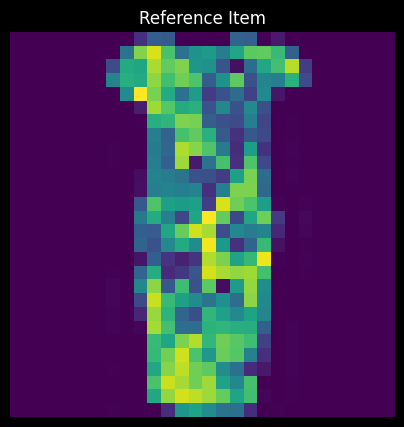

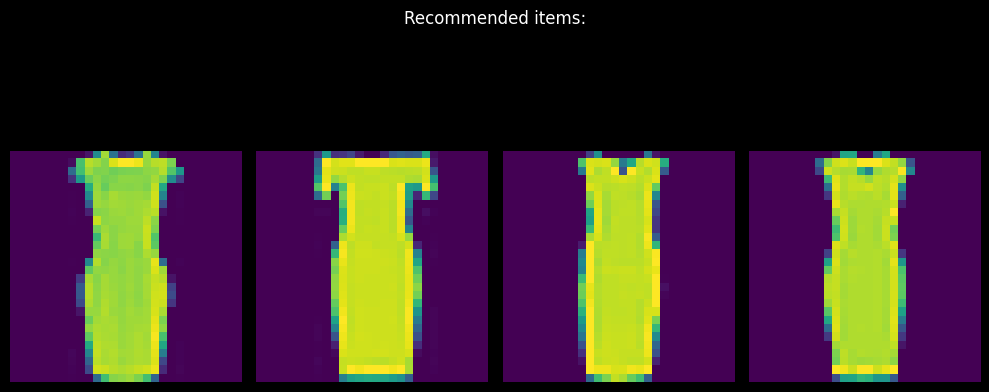

In [220]:
#recommend images similar to image on this index:
rid = 100

def recommendImage(imageid , similarityMat , asc = False):
    timageids = similarityMat[imageid].sort_values(ascending  = asc)[1:5].index
    # print(f"{timageids=}")
    plt.figure(figsize  = (5,5))
    plt.subplot(1, 1, 1)
    plt.imshow(xtest[rid])
    plt.axis("off")
    plt.title('Reference Item')

    plt.figure(figsize = (10,5))

    for i , iid in enumerate(timageids):
        # print(f"{iid=}")
        plt.subplot(1 , 4 , i+1)
        plt.imshow(xtest[iid])
        plt.axis('off')

    plt.suptitle('Recommended items:')
    plt.tight_layout()
    plt.show()
recommendImage(rid , cidf)

# Collaborative Recommendation Systems:


In [223]:
import pandas as pd

# Paths to the four MovieLens-100k files you mounted on Drive
base_path  = "./data/ml-100k/"
ratings_all = pd.read_csv(base_path + "u.data",
                          sep="\t",
                          names=["user_id", "movie_id", "rating", "timestamp"])

ratings_train = pd.read_csv(base_path + "ua.base",
                            sep="\t",
                            names=ratings_all.columns)

ratings_test  = pd.read_csv(base_path + "ua.test",
                            sep="\t",
                            names=ratings_all.columns)

users  = pd.read_csv(base_path + "u.user",
                     sep="|",
                     names=["user_id", "age", "sex", "occupation", "zip_code"])

movies = pd.read_csv(base_path + "u.item",
                     sep="|",
                     names=["movie_id", "title", "release_date", "video_release_date",
                            "imdb_url", "unknown", "action", "adventure", "animation",
                            "children", "comedy", "crime", "documentary", "drama",
                            "fantasy", "film_noir", "horror", "musical", "mystery",
                            "romance", "sci_fi", "thriller", "war", "western"],
                     encoding="latin-1")


### 2 What each table contains (with an Indian analogy)

| Table                         | Rows    | Columns                                      | “What it means”                                            | Bollywood-friendly analogy                                                               |
| ----------------------------- | ------- | -------------------------------------------- | ---------------------------------------------------------- | ---------------------------------------------------------------------------------------- |
| **ratings_all (`u.data`)**    | 100 000 | `user_id`, `movie_id`, `rating`, `timestamp` | Every time someone pressed ★1–★5 for a film                | Think of BookMyShow logging every viewer’s star rating the moment they leave the theatre |
| **ratings_train (`ua.base`)** | 90 570  | same 4                                       | 90 % sample we’ll learn from                               | Your historical data till last weekend                                                   |
| **ratings_test (`ua.test`)**  | 9 430   | same 4                                       | 10 % sample kept aside for evaluation                      | Ratings from the latest movie releases, used only for judging accuracy                   |
| **users (`u.user`)**          | 943     | `age`, `sex`, `occupation`, `zip_code`       | Who rated what – basic demographics                        | Viewer is a 24-year-old _software engineer_ from Bengaluru (pin 560001)                  |
| **movies (`u.item`)**         | 1 682   | 24                                           | Film titles, release dates, IMDb link, plus 19 genre flags | “3 Idiots (2009)” gets `comedy=1`, `drama=1`, everything else 0                          |

---

### 3 Quick sanity-check numbers

| Metric                   | Value        | Interpretation                                                         |
| ------------------------ | ------------ | ---------------------------------------------------------------------- |
| Distinct users           | **943**      | A small city-size audience—the “Bhopal multiplex set.”                 |
| Distinct movies          | **1 682**    | Roughly every major Hollywood (and some Bollywood) release up to 1997. |
| Ratings per user (mean)  | \~106        | Each viewer has scored \~100 films—plenty of signal.                   |
| Ratings per movie (mean) | \~59         | Each film collected \~60 opinions.                                     |
| Global mean rating       | **3.53 / 5** | Viewers are slightly generous—like IMDb averages.                      |

---

### 4 Why these three tables matter for modelling

1. **`ratings_all` / train / test**
   _Fuel_ for collaborative filtering. `user_id` ↔ `movie_id` interactions are what matrix-factorisation or KNN algorithms learn from.

2. **`users`**
   Lets you build **hybrid** or **demographic** recommenders. Example: if 18-year-old Delhi students rate thrillers highly, you can use that prior when a brand-new Delhi student shows up (cold-start).

3. **`movies`**
   Powers **content-based** similarity. Even if two films never share the same audience, you can still link them through shared genres (“action-thriller”) or release year.

---

### 5 Relating it to an Indian OTT scenario

Imagine this dataset were captured by **“DesiStream”**, an Indian OTT platform in the late 1990s:

- **User ID 512**

  - 24 years, _male_, _student_, PIN 560103 (Bengaluru).
  - Rated ★★★★ to _Dilwale Dulhania Le Jayenge_ and ★★★★★ to _Sholay_.

- **User ID 777**

  - 23 years, _female_, _software engineer_, PIN 411001 (Pune).
  - Loves _Andaz Apna Apna_ (comedy 1).

When a _brand-new_ Pune engineer lands on DesiStream, we can:

1. **Collaborative** – Find users with similar rating patterns (User 777) and suggest what they adored.
2. **Content** – Notice she binge-watched comedies, so surface _Hera Pheri_.
3. **Hybrid** – Blend the two signals for a stronger, personalised queue.


In [224]:
ratings_train.head()

,user_id,movie_id,rating,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


In [225]:
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [226]:
movies.head()

,movie_id,title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,children,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [229]:
from lightfm import LightFM
from lightfm.data import Dataset
import numpy as np


/opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages/lightfm/_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn(


In [232]:
# initialize dataset

dataset = Dataset()
dataset.fit(users = ratings_train['user_id'].unique() , items = ratings_train['movie_id'].unique())

# build interactions

interactions , weights = dataset.build_interactions([(row['user_id'] , row['movie_id'] , row['rating']) for _ , row in ratings_train.iterrows()])

print(f"Unique interaction weights: {np.unique(weights.tocoo().data)}")

Unique interaction weights: [1. 2. 3. 4. 5.]


### create dataframe for interactions and weights and merge them to a single df for visualization:


In [241]:
interactions = interactions.tocoo()
weights = weights.tocoo()

idf = pd.DataFrame({"user_id": interactions.row , "movie_id":interactions.col , "interaction": interactions.data})
wdf = pd.DataFrame({"user_id":weights.row , "movie_id" : weights.row , "weight": weights.data} )

idf.head() , wdf.head()

(   user_id  movie_id  interaction
 0        0         0            1
 1        0         1            1
 2        0         2            1
 3        0         3            1
 4        0         4            1,
    user_id  movie_id  weight
 0        0         0     5.0
 1        0         0     3.0
 2        0         0     4.0
 3        0         0     3.0
 4        0         0     3.0)

In [243]:
vdf = idf.merge(wdf , on = ["user_id" , "movie_id"])
vdf.head()

,user_id,movie_id,interaction,weight
0,0,0,1,5.0
1,0,0,1,3.0
2,0,0,1,4.0
3,0,0,1,3.0
4,0,0,1,3.0


### Get a subset of interactions and weights and visualize them:


In [248]:
ssize = 10

# conver to csr format for faster slicing:

interactionscsr = interactions.tocsr()
weightscsr = weights.tocsr()
islice = interactionscsr[:ssize , :ssize].toarray()
wslice = weightscsr[:ssize , :ssize].toarray()
islice , wslice

(array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 1, 1, 0],
        [0, 0, 0, 1, 0, 0, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [1, 0, 0, 1, 0, 0, 0, 0, 1, 0]], dtype=int32),
 array([[5., 3., 4., 3., 3., 5., 4., 1., 5., 3.],
        [4., 0., 0., 0., 0., 0., 0., 0., 0., 2.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [4., 0., 0., 0., 0., 0., 2., 4., 4., 0.],
        [0., 0., 0., 5., 0., 0., 5., 5., 5., 4.],
        [0., 0., 0., 0., 0., 0., 3., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 4., 0., 0., 0.],
        [4., 0., 0., 4., 0., 0., 0., 0., 4., 0.]], dtype=float32))

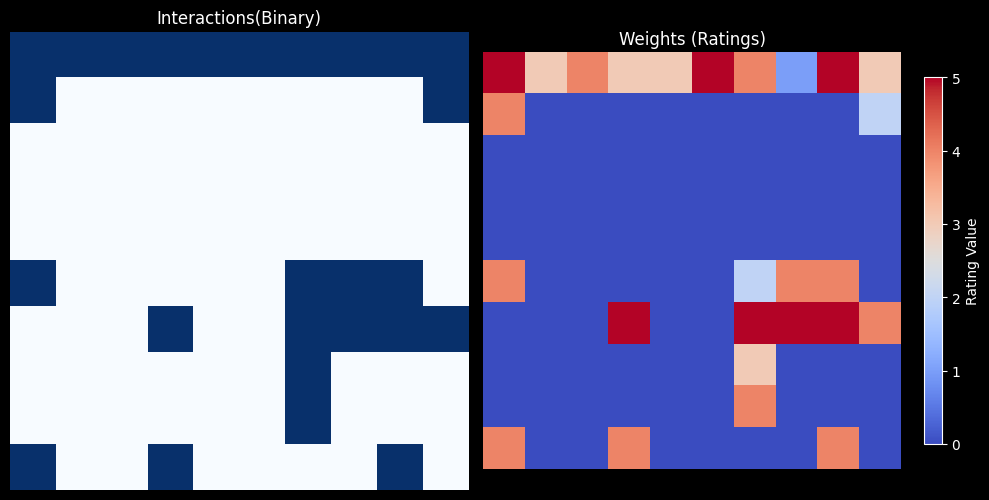

In [278]:
figure = plt.figure(figsize = (10,10))

plt.subplot(1 , 2, 1)
plt.imshow(islice , cmap = 'Blues')
plt.axis('off')
plt.title('Interactions(Binary)')
plt.xlabel('Movie index')
plt.ylabel('User Id index')

plt.subplot(1 , 2, 2)
wimage = plt.imshow(wslice , cmap = 'coolwarm')
plt.axis('off')
plt.title('Weights (Ratings)')
plt.xlabel('Movie index')
plt.ylabel('User Id index')
plt.colorbar(wimage , fraction = 0.04 , label = 'Rating Value')

plt.tight_layout()